In [1]:
! git clone https://github.com/deepchem/DeepLearningLifeSciences.git

Cloning into 'DeepLearningLifeSciences'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 204 (delta 0), reused 2 (delta 0), pack-reused 200
Receiving objects: 100% (204/204), 29.68 MiB | 24.57 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [2]:
# INSTALL CONDA ON GOOGLE COLAB
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
! conda install -c rdkit rdkit -y
from rdkit import Chem

--2021-02-19 03:16:26--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   207MB/s    in 0.4s    

2021-02-19 03:16:27 (207 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [3]:
# install other pip
!pip install pandas
!pip install seaborn

     |████████████████████████████████| 285 kB 8.7 MB/s 
     |████████████████████████████████| 11.5 MB 13.5 MB/s 
     |████████████████████████████████| 27.4 MB 47 kB/s 
     |████████████████████████████████| 1.1 MB 48.3 MB/s 
     |████████████████████████████████| 67 kB 4.4 MB/s 


In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import rdmolops
import seaborn as sns

In [5]:
# the .ism file is cloned from http://dude.docking.org/targets/mk01/actives_final.ism
path = "/content/DeepLearningLifeSciences/Chapter11/mk01/actives_final.ism"
active_df = pd.read_csv(path,header=None,sep=" ")
active_rows,active_cols = active_df.shape
active_df.columns = ["SMILES","ID","ChEMBL_ID"]
active_df["label"] = ["Active"]*active_rows
PandasTools.AddMoleculeColumnToFrame(active_df,"SMILES","Mol")


rm: cannot remove 'tmp.html': No such file or directory

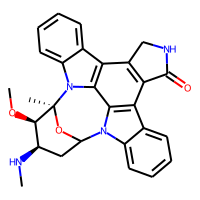

In [6]:
print(active_df["Mol"][1])
# push on tmp(failed)
!rm tmp.html
!touch tmp.html
file1 = open("tmp.html", "w")
file1.write(str(active_df["Mol"][1]))
file1.close()


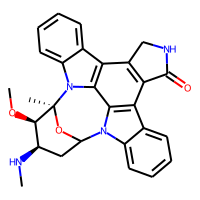

In [7]:
# %%html
# <img data-content="rdkit/molecule" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAgAElEQVR4nO2deVwT1/r/nwkJ+w4iqwoqKlp3rRS3Kq4N1GulWi1f9WppFRust0ptrdFaFfvTNmqroq1Kba0Fb6/iclXcwa2AIqIiF0FAZA1IWAMkz++Pg0NkCRBmJqB5v/iDmUzOcwKfnDlzzrNQiAg6dDANT9sd0PFqohOWDlbQCUsHK+iEpYMVdMLSwQo6YelgBZ2wdLCCTlg6WEEnLB2soBOWDlbQCUsHK/C13YE2kJGRUVVVZWNjY2trq+2+6GiBzjFi1dbWbtmyxd3dfdasWc7Ozh9//HFmZqa2O6VDLdjhefjw4fDhwwFAT0+vX79+FEUBgEAg+L//+7+kpCRt905H03RoYSmVytDQUBMTEwDo3r375cuXETExMdHf35/P5wMARVFCofDatWva7qmOhnRcYeXm5gqFQjKs+vn5FRcXq76anp4uEomMjY3JBV5eXpGRkUqlUlu91dGADiqso0ePkhm6paXl4cOHm7ssPz9fLBZbW1sTeb3xxhthYWE1NTVcdlVHk3Q4YZWUlAQEBBChTJ48OTs7m36purq6ybeUlpZKJBJnZ2fyrh49ekgkkvLycq66rKMJOpawrl+/3qtXLwAwMjKSSCT0rU2pVEokkr59+8pksubeK5fLw8LC+vXrR+TVpUsXsVgslUq56ruOl+gowqqurhaLxXp6egAwYsSI5ORk+qUnT56MGzeOTNXV3BYJCoUiMjJy1KhRRF6mpqYikSgrK4vl7utoSIcQ1v3794cOHQoAfD4/ODhYLpfTL4WHh1tZWQFA165dT5w40fo2o6OjhUIhWZvQ19f39/d/+PAhC33X0TRaFhZZUCAPd66urtHR0fRLxcXF8+bNIwPPzJkzCwoKNGg/ISHB39+fDIQ8Hk8oFN68eZO57utoFm0KKycnZ9q0aUQ6/v7+paWl9EtRUVFOTk4AYG5uHhoa2k5DKSkpixcvNjAwIHOvBisXOthAa8IKDw8nywR2dnbHjx+nz1dWVgYHB/N4PADw9PT83//+x5TF7OzsefPm8fn80aNHM9WmjubQgrCeP3/u7+9PBqqpU6c+e/aMfikxMXHgwIFkx0YsFtfW1jJr+uHDhwDg7u7ObLM6GsO1sK5cuUIWnMzMzH7++Wf6fG1tbUhIiL6+PgB4eHjEx8ezYV0qlZJFVzYa16EKp8KSy+Vbt27l8XhvvvlmSkoKfT49PX3s2LFkQSEgIIC9tU2lUikQCCiKUn3w1MEGnAqrsrKSrCmo7rocPnzY1NQUAFxcXM6fP8+40WnTpjk5OWVkZJBDR0dHAHj69CnjhnSowqk/lqGhobm5eW1tbVlZGX3SxsamvLzcz88vISFh4sSJjBstKCjIzs7Ozc0lh3Z2dgCQn5/PuCEdqnDtQWpnZyeTyfLz8y0tLcmZyZMn37p1a8SIEexZBBUldenSBXTCYh+uPUibHDDYU1Vji7oRixs6hLC4tKgTFje8+sIi976CgoImD3WwxKsvLN2IpRW4Fhb3A4ZOWFpBN2LpYIXXRVj0GKkTFje8FsKiKCo/Px8RAaBr164cd+D15NUXlr6+voWFRU1NzfPnzwHA2NjYxMSksrKytLSUsz68hnAtLBsbGz09vaKiotraWs6MNjnN0q04sArXwtLT07OxsVEqlcSDhRtegfn7s2fPrly5MnLkyDVr1ty8eVOpVGq7Ry2ghaQg2loj7bzCQsRFixZNnDgxNjZ248aNnp6ednZ277///q+//kru7x2Q10JYnX0fes+ePWfOnLGysjp+/HhwcHC/fv2kUmlERMT8+fNtbW1Hjx69ZcuWBw8eaLubL/E6CqtzjVhpaWnBwcEA8NNPP/n6+oaEhDx48ODBgwfffffduHHjKIq6du3aF1980b9//+nTb37+OVy6BBxOX5uHexcwkUgEABKJhDOLMTEx33//PR34tW3bNgBYvnw5Zx3QGIVCQXxrP/zwwyYvKCoq+uOPP+bNm+fm1pvPrwVAADQxQaEQQ0NRJZwA5XIMDUU6iC4qCp8+xf37saqq7kxKCjLoZ6kFYW3YsAEAvvrqK+5NEw4dOgQAc+fO1VYHWs+mTZsAwMnJqcVcAQoFxsWhWIzDhiFFIVEYj4fDhqFYjHFxWFyMeno4f37d9e+/j+fOobMzFhXVnTlyBBctYqznr8WtsKN1oJXcv3//m2++oShq3759dEad5uDxYNgwWLcO4uIgLQ127oQpU0AggPh4WL8ehg+HnTvBzQ2ePIHLl7novBaE1eTcuaioiMRmsU1VVVVERIS1tfXdu3fPnDnDgUXNkMvlc+fOraqqCgwMpMN6W0mPHrBsGZw5A8XFEBUFIhE4O8PYsQAAEgl8+ilUV9dfvGsXfP89fP89nDrFZP87yoglkUj69+/v4+Nz48YN9kwnJCQMHz78559/fv78eUFBwTvvvLN27VqFQsGeRY1Zu3ZtYmJiz549N2/erHEjRkbg7Q3bt0NmJgwaBAAweDC8/TZs21Z/jZ0d2NuDvT288BVnCMZuqq0mJSUFAHr27Kl6cvXq1YaGhqRL48eP/+9//8usUZIIiUTZ9+3bNzY2ViKRCAQCABg3bpxq0GxH4Nq1a3p6enw+/8aNG0y1+fw59u5d/8vYsezOsbQTCQ0ARkZGRfRnQsQX6flIbhkAGDhwIFPp+VQTIQUEBJSVlZHzV65cIdFgXbp0OXv2bPsNMUJZWVnv3r0BYM2aNQw2SwsLEQ8dQoBXTliIuHHjRkNDwyaTV8lkMolEQjKCAICrq6tEIqmoqNDYlmoipJMnTzZ4NT8/f8qUKQCgp6cnFosVCoXGhpiCJDQcMmQIs1G1FRVIC1WpxC+/xAcPcPVqpKOD4+Lw0CHGzGlHWKmpqZMnTybS0dfXX7Ro0aNHj1QvIOn5+vbt+2IeYCcWixuMcC1SXFw8d+5c0sJ7771XWFjY5GVKpTIkJISkOpowYUJOTo7mH6zdnD17lqIoAwODxMRENtqPjcXhw3HZMjbafgltpjEiyatIYm2SvKrBlIKk53vzzTeJOMzMzEQiUSuDmM+dO9emREgXL160t7cHACcnJ9U0XVxSXFxMElts3bqVJRMXLiAATpjAUvP1aD+jX1pamkgkMjIyIuppMrH2uXPnJkyYQC4wMDAICAhITU1trsGKigrVREhqrmxAXl6et7c3APD5fK3cFmfPnk3+Aoyn2aGJiUEA9PJiqfl6tC8sQl5enlgspsOjBw0a1HjmfufOHTo9n2qmGlViY2PJDVSzREi1tbVisZiIUigUcpkb9/fffwcAExMTBlOCNebvvxEAhw9nz0IdHUVYBDJzJ09qAODm5tZ45p6cnLx8+fIqeovrBQ0SId2+fVvjbpw/f554MLu4uHBT9iI7O5usrTf3hWGKu3cRAAcOZNUIYkcTFoHM3N3d3VVn7urzO6anp48ZMwaYS4SUlZXl5eVFboshISGs1rxQKpVkbd3Hx4c9K4SHDxEA+/Rh206HFBaBzNzptA5k5q5aT4AmLCyMToR08eJFpjpQU1ND3xZ9fX3b+kzaen788UcAsLW15eCBNC0NAdDVlW07HVhYNCSxNj1z9/f3p9cm8vPz3333XfKSn58fG1OiyMhIcpPq1q0bGxmXHz9+TL4V4eHhjDfemOxsBEBHR9YNUYjYqq0fbXP79m2JRHL48GGFQsHj8aZPnz558uTNmzfn5ORYWFjs3LmTzmvKOJmZmbNnz75586aBgcGWLVuCgoLa9Pbi4uKKioqKigqZTFZaWlpZWVlWVlZSUlJRUVFeXv7LL788fvz4ww8/JM48bFNYCF26gK0tsB1K0mmERUhNTd25c+fevXurqqosLS2fP3/u7e194MABupAOS8jl8s8//5zcs955551Zs2ZVV1fLZDKiGCKdysrKkpKSsrKyiooKIp3KysqKigr1Lbu4uOTn59+6dWsQ2SVmmdJSMDcHMzOQydg11MmERcjKygoMDDx16lTfvn2TkpJI+QkOOHbsmL+/v5mZWU5OTuvfZWlpaWRkZGxsbGlpaWJiYmxsbGZmZmZmRiIcz549m5CQMHLkyKtXr5I9claRy5VTptzl8+Xnz49i1VCnFBYAFBQUODg48Pn8goICMzMzzuyOGzfu6tWrI0aMGDJkiJmZmZGRkampqYWFhbGxMS0dIyMjc3NzWjrqG3z+/PmwYcPS0tICAwPJiMgqiEgWAhUKBbtfSNZncaxBlgP+/e9/s2fi4sWL69evp9fuCwoKBAKBQCBobttRMxISEsjGw6+//spgs81BlvrYzhvdOYqNN4mPjw8AnDhxgj0Te/bsEYvF//nPf8hhRERETU3N5MmTbWxsGLQyaNCgH374AQCWLFly//59BltuEnLDlcvl7JphVbasQiLpbGxsWNpZKysrMzExoSjqyZMn5AwJmDnEnHNJZWUl/fv8+fMBwN3dvaSkhKn2m4R8KzQretV6OrGwEJE4xMXExLDRONm8owvvZGdn83g8Q0NDpv7xycnJAwYM2Lt3LzmsqKgYPHgwAMyePZuR9puD7Jg1udTMIJ34Vggs3w3/+OMPAJgzZw59qFQqfXx8zM3NGWk/Li4uKSlJJBLduXMHAIyMjMLDw83Nzf/8889du3YxYqJJdLfClrl06RIA9OvXj/GWi4qK9PX19fT0cnNzyZnhw4cD088Kn3zyCQB0796dfhr4888/AUAgELC3+d2nTx8AYLssaOcWVm1tLZkxqFbmYYR9+/YBwOTJk8lhamoqRVHm5ubtcZJuTFVVFdGrUCik97lJpLiLiwtL0yBSX+3YsWPjx49v4LjLIJ1bWIi4YMGi4cOnhYYmMNssKb6yf/9+cvjNN98AwHw6jpg5MjIyyHdjy5Yt5Ex1dTVZSZk+fTobzoZkX59El5iYmOzatYsN341OL6wjRxAAx49nss2cnBw9PT19fX16V7t///4AwHhQGuHkyZM8Ho/P51+5coWcyczMtLW1BYBvv/2WQUNJSUnBwcGGhobdunW7dOkSidoAgEmTJjFej73TC6ukBPX1UU8PGVyz3L59OwDMmDGDHN69excAbG1tq6urGbPxMqtXrwaArl270g9r58+f19PT4/F47Y9LS0lJWbduHe3fBgA//fQTeeno0aNEwRYWFu0vkaxKpxcWIk6ahABMhi55enoCwJEjR8gh+a8vWbKEMQONUCgUkyZNInco2iFbLBYDgJ2dnWZF8AoLC0NDQ728vOitGxsbG5LATTUEKC8vj3Y9mjVrFlMTu1dBWDt2IAC+/z4zrWVkZFAUZWJiQse19urVCwDo+xRL5OXlkbCi1atXkzMKhYLEPI4aNar1OzAlJSVhYWFCoZCEP5HRyN/fPzIysqamhqT6MTAw+O6771QncD///DPZcnVwcLjNROzuqyCsJ08QAM3NkZHtL5IrgU5yRHJJODo6chC0c/36dVIA9q+//iJnpFJp9+7dAeBf//qX+vdWVVVFRkb6+/vT294GBgZCoTAsLIz+hiBiRUWFSCQiY5inp6fq0/STJ0/Gjx/vYWursLVFf3+UydrzWV4FYSHiwIF1MePth/hFRUZGkkPi1rdixQoGmm4F3333HQBYWlo+fvyYnLl586a+vj5FUUePHm18vUKhiI6OFolEJIcPAPB4PC8vL4lEouamdvbsWeLBZmxsLJFI6KdChUKRs3s3GhoiALq5YTviK18RYa1ZgwD46aftbYekUrK0tCRRQAqFgtyeYmNjGehlK1AqlTNnzgSAQYMG0WtmZIvazMxMdVUzKSlJLBa7urrSU3IPDw+xWJyWltYaQ8XFxbTP7ZQpU16axt2/j8OGIQBSFIpE2CggqjW8IsK6dQsBsFs3bOeKzNq1awFg0YvkGBcuXACAnj17shql04Di4uKePXsCwCeffEKf9PPzA4A33ngjOTlZIpGQXUVCt27dgoODNVtJ/+OPP4hHv62t7X9VNxVqajAkBAUCBMD+/TE+vq0tvyLCUirRyQkBMKF9C6Xk/xcVFUUOP/roI2A660truH37NknqRI+UJSUlZMedpmvXriKRqP3xHbm5uT4+Pnwer3jQIPTzQ9WAlFu3sE8fBECBAMVibIsXySsiLETctAm//hozM9vbTnJyMvHDqa6uJmviSUlJDPSvjRw8ePDPP/9UPUNS9BgbG/v5+UVGRjK4qKZUKhN//RVNTBAAnZ1fmquWl2NgYF1WU5Go9W2+OsLq3x9/+63u9w0bsP2bxcRpYiAHUcOtY+TIkaq7TMyTloZjx9ZNrQICUOVZEqOisG9fbEvs/6sjLCsr9PCoG8iXL8eDB9vb4Lx58wBg06ZN7e9b+7l9+zYAWFlZtT/IWx0KBUokaGDQxFOhQoHl5bhvHwYF4ebNmJ6uvqXO7Y+likAAgYEQHFx/5vx5OH8ebtyA+HiIj4c7dyAtre4nNxeKi2uLi4tLSkqabK2qqoqMWGTWpXVInMXixYuNjY1ZNMPjQVAQxMXBkCGQlgZvvw1ffFGXCpeiYMoUSE4GPz9wcABvb7h3T11TLMqfW+zssLYWhw7FmBhcvhwPHKjLdd7cz6BBDavQmJiYWFlZWVlZ2draOjg4AMCAAQO0/bEQEYuLi42NjSmKYtw7qFmqqnDVKuTxEACJ79CJEzhpUv0FYWHq9zr4bGlfG+jpwU8/QWAgeHmBUgne3gAAZWVQUwMAoFDUR2mWl4OZWa2VlZVSqaQHrfLy8vLycro1GxubzMzMjIwMsvatRfbv319RUTFt2rQGD4YsYmAAW7bAjBkwfz4sXgwAkJgIb71Vf4GXF2zapK6F5hTn6+trZWXFniMY49jZ1f2yeDE6OGgyxyotLS0qKioqKsrPz09NTSUJI0aMGNE4ZRKXKJVK4phAbwZwCv3ZN2/Gr7+uP//oEXp4qHlfs3OssrKy4uLi9PR0Zr4BHLJlS90Q1VZMTU3JrbBLly49e/Y8dOiQm5tbbGzsihUrmO5jGzh37lxKSkq3bt2mT5+uBfN0cPbgwRATU38+JgaGDFH3xuYUt3jxYgDYvXs3M8JnjepqFArx6NGXlkbT0phxz6JDScPCwhhoTiOIT8vmzZu11YE6lEqcNAmDgvDKFfzlF+zdG9Wu9TcrrI0bNwLAqlWrWOgjkyxejADo4oKMOqPXs2fPHgAwMTHRyjJpZmYm8WXNy8vj3npDamrw4EH87DPcsgVb8jhtVliHDx8GgFmzZjHdOyb54QcEQCMj/PtvFq1wFkramK+++gqarynXkWlWWDdv3gSAoUOHctmbNnH2LPL5SFH4xx/sGuIslLQBcrmcpELlJg8qszQrLFJEydLSksvetJ7kZLS0RABct44LcykpKSRO9ccff+TCHiK+uGkMGjSIM4sMom6BlPiqqs8qqxWKirB3bwTAmTPb6yfTejgIJW3A6NGjAYDZGAfOUCesN954AwDi2+6Lwyo1NThxIgLgkCEv7ZNyANuhpKokJSUBgIWFRRnHH5Ih1O0Vurm5AUBaWlqbFj4IqampX3/9tQZvbJFvv31y4QI4OEBkJLSU1Yxhtm7d6uXllZWV9cEHH7Bd5ZBsDi5YsKDF1G0dFDWiu7hx49FRo57t2KGBYHfv3r1w4UL6kKlMQ7t27aIonrf3BRbyF7eKrKws4l2+YcMG9qzIZDIypdPKGgcjqN2E3r4dAVCjeLo5c+YcVNlVWbly5fbt2zVoR5UrV66QsILfaMcrbcBgKGlz7Ny5EwAmTpzIUvscoFZYJ04gAE6ZokG7jo6O6SouOyNGjFAtqXX16tXS0tI2NZiWlkZidr/88ksN+sMs7QwlbZEBAwYAQJNhOZ0FtcK6fx8B0N29rY0mJye7uLjQhzKZzMzMjN7KVSqVtra2bfqXyGQykj1hxowZHaFWpUKhmDp1KrQxlLSVXLx4EQAcHBzYi+jnALXCqqhAikJ9/TZ50SNiVVWVatDIjRs3hEIhfZiYmOiuIlapVKo+GrO2tpY4Gnh4eHC/9t0cUqm0R48ewELIIXEtXL9+PbPNckxLjn729gjAQIiCCnFxcTtUHgj+85//TJ06lT5sHGi1fPlyALC1taVjODsIdChpREQEU20+e/ZMIBDw+XyWbrKc0VKedy8vuH4dLl+GceNYeizNyMjIy8sjkQIAsGPHjuLiYjKJAYCDBw8uXLhQIBBERUWNY60PGrN9+/bly5ebmZn9/fffdKHh5qiuri5qnuLiYqlUmpmZWVhYKBQKIyMjufkILNGSB6mbG1y/Dunp7Amre/fuqi6ay5Yto8uEhIWFbdu2jcfj7d27twOqCgCCgoJiY2N///33mTNnktKKqlqRSqWqh2VlZa1p09DQkK4323lpSVgkgptDdz8ej0eqYW3YsEEsFiMiRVEk6rxjsnv37uvXr+fl5ZHMMGoQCATWLVFWVjZhwoTTp0/TS1mdlNYJS6PFd41RKBTLli3bs2ePnp6es7NzRkZGfHz822+/zWUfWo+ZmZmnp+fhw4fd3NwGDhxoZWVFq8TGxkZVNK0szTJ+/PhLly79/vvvS5YsYbvzLNLCHCwxEQMDWXdMUaGsrIw8AxoaGoaHhy9duhRU8nN2TMjsiqlqhkeOHIGOFCirGS2NWA8ewNOnsGMHXLwIYjE4ObGqcqlU6uvre/36dWtr6+PHj48ePZqEzcTGxrJqtz3k5+c/evTI1NR06NCh6q8sKytrbgYml8t/++03ctnMmTMdHBwSExNv3rw5ahS7NbpYRJ3qTp3CwYPx0SOsrsY//0Q3N7b8fxERMTU1lYQ3ubq6Jicnk5Nkk7979+7s2W0nZIBRXTGJj49fsWLFggULfH19R48e7eHhYW9vT0ojNQePx1PdTv3iiy8AYMGCBdr4QMygdrlhyhT47DOYOrXu8IMPQCgEqRSOH4ePPoLZs4G5umS3bt3y8fEpKCgYMWLEiRMniOckACiVSisrK5lMlpubS5/sUCxdunT37t2bN28magCA8PDw2bNnN77SxMREdcrVYAbm6+tLCr4BQHp6eq9evQwMDJ4+fUrSDHU+1KnOzQ1f1CdCRNywAZcurQ8lHjUKb9xgRN3Hjh0jkeOTJ0+WNcpQSBYaTp48yYgtxunXrx8A3FD5U6Smpm7btu3AgQPHjx+Pjo6+f/9+Tk5OW3d+yJaRRCJhur8coVZYQ4agqtvGypU4evRLYeoUhXPmtJgfQj379u0jaVgXLlzY5O7YypUrAYAsPXQ08vLyKIoyNTVlfF+P1LLr27cvlznfGEStsJYvRzqBfU0N9ulTl0KpwY++PopE+Px5W20rlUqywk5RlBrdhIeHA8D06dPb2j4HEH/lKRo5gKinpqaGZKm8fPky441zgFph5efjiBG4eDGGhOBbb+HUqeqSbNjZ4Z49rd+ulsvlJE8Qn8+nS6s1SXp6+kA7u20d0jmJrIawlOqIfOs++OADNhpnm5bWsaqr8epVjIjA5GT8+usWErgAJNnbnzlzpkWrMpmMrFObmpqePn265W7a2SFAO++5bODnt8bR0YWl8IqsrKwOFK3aRtqSxkgmQ2dn1NNTI6wKAAHAtGnT7t+/31wz2dnZJEzP3t6+tZEa06cjAL6cOlHr5OcjRaGJCbLnN+Xr6wsdfn24SdqeH6u8HE+fRpEI3d0bC+v4i4dNPp+/ZMmS/Pz8Bu9OSkrq1q0bAPTr1++J6iOnesRiBMDPP29zb9kkIgIBXkoaxTinTp0CADc3t47g3tgm2pd4LS0Nd+/Gd99FMzMEqAFosJ9nYWGxZcsW2nf04sWLlpaWADBq1Ki2RVCdPIkAOG5cu3rLNMuWIQAyWp+rIQqFgrgTnmOkOAKHMJTRr7q6/NSpLZ98MnjwYKrRqqmrq2t4eHh4eDhJMf2Pf/yjzeUk8/MRAE1N2+rLyioDBiAAslOQup5vv/0WAN577z12zTAN86kic3JyDhw4MGfOHJLLugHLly/XcFTv3h0BsMOEQxUWIo+HxsbMFPBRQ05ODvEpZbs8OLOwmIO0trb25s2b69ev9/T0pCjK2tp66dKlmjfn54cAyF4y6jZy9CgCoLc3F7ZmzZoFLEcyMg6LWZP19PTefPPNtWvXXr9+/cMPPywqKiIx+xoyYgQAQIdxc7hyBQDY86t9iY8//hgA9u7dy3b4NYNwlI6beCy1K/HkayysiRMnuru7Z2VlnTlzhgt7TMCRsEiRKs3SQNQxbBiYmICxMaiP/uCEoiJISgIjI3gRAsIuFEWRqj6hoaFc2GMCjoTVnvwidZiZQVQUzJwJoaHw8CFjPdMIqRQmToSJE+tTv7LNwoULDQ0NT506lZGRwZHJ9tF5Rqxt2+Czz8DGBng88PWFY8cY61yrkcvh448hORl694Zz52DGDEhK4si0jY3NW2+9hYgzZsyIiIioqqriyLDGcPaY0K40bkVFaG+PRUV1h/fuoZsbg31rJWVlaGSE48fXZXubOxdbs8/JCDt37tTT06PrnZAyz1FRUR3WqYa7WjpkBVnDQevhQ3B3ByurusMBA6C8HIqKGOtcq7G3BxcXCAvjzqJCoQgKCvr000+VSuVHH320Z88eLy+vkpKSQ4cOTZo0qVu3bkFBQXfv3uWuQ62EMwmTfOUaZlC5ehUnTHjpjJMT5uYy0rHWU1aGrq6YnY2urlhYyMWIJZPJ3nnnHQAwMDBQzTX/8OFDsVhMCrESPDw8QkJCcjn/mzQHd8IiKRi+++47Td6cl4eOjlhZWXeYlYX29lhSgu+8gxcuMNjJ5lAo8PhxLCpCV1dExG3b8OOPWRfW48ePPTw8AMDW1vbKlStN9aqu0ji9yaGnp+ft7d2gcr1W4E5Y27dvB4AlGqVxQ0QUiXDuXLx3D//+G8eNw127cNOmOq+KsWORNTdLuRzDwrBfPwTA3bvrhFVTg0OG4KBBePIkfvABNvVPby8xMTF2dnYAMGDAgPSWHNGqqqoiIyP9/PzoWCBzc3N/f//IyEimciHOcNcAAAzBSURBVCm2Fe6ERcr/ae7Fq1RiWBguWIABAXjqFCJiWRlKJNi1a528vLyYHb2kUvz22/rme/TAgwfrhIWIMTFIURgUVOf6/89/MlNkhbB//34ikalTpz5v5PMdHh7+7rvvHj16tHH1qKKiotDQUC8vL9oVwNnZWSQS3blzh7HOtQ7uhHX//n0AcG97GrcWKC3FkBC0tq6X18WL7WwyPR2Dg9HCoq7JwYMxLAxrarCmBg8frr/s3//GtDQMCUFDQwRAa2sMDW1venA6DgAAAgICampqGl9DZl0AYGVlFRAQcPXq1cbPhsnJyU1OwnJyctrVv1bDnbAqKiooitLX12fFZ+35c1y/vq6mAABOmZL3ov57m7h9W/HBB8jn141DU6bg+fMtvys1FSdPrr8tP3iggWVExLKyshkzZgAAn89XU6lAKpWSYYkWjYuLS3BwMB3lS6NUKq9evfrRRx8RNzjS8vTp09vgYqkpnFZYtbe3B4BMRtO4vYRMhiEhaGmptLZ2MDX19va+detWK98aHR0tFArHjTsGgAIB+vm1uT5PeHida75AgMHB2NYih0+fPh02bBgAWFtbX2jdPf3BgwdisZjsaqh/NlSdhBkYGCxbtoztPJScCuutt94CDuKZpNJbW7fSqV18fHzUeNZXV1f/9ttvgwYNIhc7OPReuVKhsfILC/Gf/0SKQgDs2xdjYlpb9v327dvOzs4A0KtXr4dqy7U1pk3PhgUFBY6OjgBw7969NllpK5wKi8R7HThwgANbhYWFYrHYwsKC/K29vb3j4uJULygtLZVIJMQBHwDs7OzEYrFUKm2/6eho7N8f+/e/xePx/Pz8Gjv+NyAiIoIsqY8ZM6Y9NS8qKyvJsCQQCMiHanKB/h//+AcAHFadLbIAp8IitSrWrl3LmUUiL5LBjKIooVAYHx+fl5cnFovpnAi9evUiyfgYtCuX47ZtvxBXbFtb24MHDza596JUKkNCQng8HgAsXryYqdsTPQkjz4bW1taqAf5r164FgNWrVzNiqzk4Fdb+/ftBG9X38vLyVqxYQUYFiqLoL/SYMWMiIyPZC4B5/PgxneZvzJgxDULiqqqqPvzwQ3LnCgkJYaMDDx48+PLLLxskYI6IiAAA1TzWbMCpsC5fvgwAXl5eXBqluXPnDple9OzZUygUclbEKzIykgTLCwSC4ODgyspKRCwoKBgzZgwAmJqaclxF/NGjRwDQrVs3Vq1wKiziS+Tg4MClUcLJkyfJvc/FxUW1RgY3FBcXi0Qicsvr2bPnnj17SD5fZ2fn27dvc9yZ2tpaY2NjiqJYLRjIqbAUCoWBgQFFUeXl5ZwZra2tFYvF5J8qFAqLaN8bzomJiSG1TMiqupeXl7Zi54cPHw4ArH7BOBUWIpKcfWoC8JklPz9/0qRJZB4jFou1Hk9cXV0dGBhoZGTk5OTUeEOGMxYuXAgAu3btYs8Ed/5YBOJK2q6oilYTHR09ePDgqKgoOzu7M2fOrFu3joxbWkQgEKxbt66yslImk6lPHskqJFzq3r17LNpgT7ONuXPnjpOTk5WVlZOTU0hICHt3JaVSKZFIyNPf2LFjnz17xpIhzSA7ELTPgkwmu379eiGDm9gtERUVBQCjR49mzwRHwpJKpUuXLiU5NlVdOwIDAxmv9VhSUkIiPCmKEolEHbCGFrk70w+DxAXyyJEjnHWAVJK3sLBgz7OZdWEplcqwsDDiWgQApqamFy5ciIyM9Pb2pl07hg0bFhYWxogC7ty506tXL6LaDlvv71//+hcAfPsinciaNWsA4KuvvuKyDyRTcEZGBkvtsyus2NhY1UzlFhYWqklgHz16FBwcbPXCk71r167BwcHt2XgPCwsjq6BDhgzpaKXCVDl48CAAzJ49mxySfJO+vr5c9sHb2xsATpw4wVL7bAmrsLCQXrkhWFpaNulrUFpaGhoaSm8D83g8b2/vyMjINo3SlZWVJKQTAPz9/Zndn2Gc+Ph4APDw8CCHDx8+BIAePXpw2YfPPvsMWEtyiWwIq6YGRSK5vv4BgLdoVXXp0iUhIUH9G+Pi4gICAujCV7179w4JCWnNlDYlJWXgwIEAYGho+PPPPzP0OViksrKSz+fz+XyyCl9bW2tkZERRFJdlPsn2GnsJThkW1sWLde7hAAjwHKAHuce1foaem5sbEhJCYsWIVvz9/dUsTx87dox4sbm7uycmJjL0OViHJLOgPYZJuRTOdpkQMS4uDgD69+/PUvuMCSs7G/3961yRVH5OOTo6ttXBCBEVCkVUVJSfnx9drGHYsGGhoaGq97iamprg4GDyBDBjxozGvuEdGVKf99dffyWH8+fPB4A9e/Zw1oGKigo9PT0+n8/SOi0DwqquRomEJIts+GNtfSslJaU9jf/vf/8LDg6mXdgsLS1FIlFaWtrTp0+Jby6fz2fJNYBVvvnmGwBYuXIlOdy6dSsABAYGctmHPn36AECLUxTNaK+wTp7EXr2azqHcrRumpjLSSSwvL//ll1+I5y6oFMt0cXG5wVDZFY45duwYqMQsnT17lqzlctkHstp36NAhNhrXXFhKJfr4NJuZu0cPTEtjsJ91kAm+sbHx3Llz33777Y4T+NtWHj9+DACOjo7kMCcnh4zHXOZiWL9+PQCsWrWKjcY1F1ZqarOqcnfHrCwGO9mQwsLC6upqre8otwelUkn8Wmlf5C5dugBAFqt/uJf566+/AGDatGlsNK5uU/bJE5BI6g/37YP79+GLLyA6mqxngotLE+/q2xcuXQJnZzUNtxcbGxuBQKD1HeX2QFEUCZ9PepEJiWwMJyYmsmeUVBWlIWs0LFlU97/Jz4fIyPrDc+cgMxN+/x0CA6GyEkxNwccHGuzQ9+kDFy+CoyMbXX3VaOBiwLbHQVRUlKur66VLl+gzrq6upqam2dnZUqmUcXOafOl9fWHjRgAAOzt4//36825uEBMDDg4Mde1Vh0th/fjjj9OnTy8oKCDbRwS5XG5mZmZlZfX06VPGLbZQEzo5GRYvrvs9Ph7++U8AgJUrYeRImDcPAGDYMDA1hYMHwdQU4uLqM1jpaJEGdyKWhKVQKFasWLFjxw6KooKDgzdt2kTO5+TkzJgxIycn591336X305hEzfzr1i0cMQITEup+Jk3C06fR2Rnlcjx+HCdOxHXr8Icf6i7uzDNp7UBuQCYmJuQppLy8nMfjCQSCttZiVYNqei16MRYR7969S5zuXV1dGXdbIrQgrLffrj+cNateWIjo44PDh9cLS4cGkOid1BfLfb179+7RowdTiRWaS691+vRp8kDq6enJ3nqN5g9WP/6o9eTFnZ4Gt7979+6lp6eTsaSdXLt2zdPT88GDBwMGDIiNjR07diw5v337dqFQKJPJ5syZc+HCBRbrt6sRXW4u/vVX/eHp0/jkCf72W91dT6nE//4XO8+2b0dk1apVANAgoLT9NJleSy6XkxgK9YWSmULDBdJVq9DQEH/5hdnOvHYcOnQIAGbNmsVUg6rptUQiEZ3OTyqVjh8/HgBMTEz+Uh0tWENDYZHClGvWMNuZ146EhAQAcHZ2bjFxSGtoLr1WSkoK2W92dHSM1ShtmAZoKKyDBxEA581jtjOvHVVVVUFBQfr6+u1PSkun17KyslJNr3Xu3DnirzZ48GAWM5M1QkNhXbmCAOjpyWxnXkfS09OFQqFq4qFFixZdvny5TTuht27dcnBwAAB3d3dVP6XQ0FDS8nvvvcdl9DlqLKysLATArl2Z7czrSzuT0kZHRxsYGIwePZre0q6trQ0ODqYnW9xv2GsoLKWyLqNraSmz/Xnd0TgpbUxMDB0/J5PJhEIhNCo7wCWau8306YMAyHLCwdeXuLg4kUhka2tL5NX6SViLZQe4QXNhTZ2KAMhtaqfXjsaVAYyMjPz8/JqrDHDt2rXWlx1gFc2FtXQpAqBEwmBndDRL40mYk5OTSCRSjV86fPgwSU45ZcoUrYeWaC6s//f/EACDghjsjI6WefLkSUhICEkjQE/CNm/eTML2ofmyAxyjubBOnkwcOdJnwYJPGeyNjtbTYBJmamoqEAj27t2r7X7VQaGmJZbv3LkzdOjQAQMGsJtmSYda5HL5yZMnDx06tGDBAnNz8wkTJmi7R3VoLqySkhJLS0sTE5PS0lL6xq9DB0FztxkLCwtra+vy8vKCggIGO6Tj1aBdgS4MlBDX8YrSLmGR8kDcJBTV0bnQjVg6WIEBYelGLB2NYeBWqBuxdDRGN2LpYIUWAlbV071798DAQFJsQocOVTRfINWhQw2dOGGLjo6MTlg6WEEnLB2soBOWDlbQCUsHK+iEpYMVdMLSwQo6YelgBZ2wdLCCTlg6WEEnLB2soBOWDlb4/9J0iUJl6uxlAAACinpUWHRyZGtpdFBLTCByZGtpdCAyMDIwLjA5LjEAAHictdFdSBRRFADge+/O3Bnd3dnZ3XFnf3IdfxIxwop+IMi9/YAZbGYRhGLdFN0pSJR66NGX2AgjrYdoLSgSIkoqeunBnEGM6ikpiOphJVCQIIsgQUpr5mwbPURvXbic7wznnpkz99PEWB45y+dsjAqr2tn1zh7AFHH3uYcaNW4UqLHRjX8CKggpRA+WkeHmEqtzUw8tRIEyE3L8TxRr/x7/R0+KClEuRCIhOEhwcS6pEH//iV/zFVMvRgLBBBGP0wQJIhIpEiUkyVwuMUlJKS/1msTr4z6/SfwKVwImCahcDfJgiIfCJglrXCszSVmER3ST6FEejfFY3CTxhJFYVUcS5UZ5EnkqBFxhIFIp4MoqRDEKYhSQuF/mcYVHVedciCdjSJMp8QgixbSk1OvzyzSslUX0kJiIx5LlEhWlgBrEoiT7lYAYVKN6iMbiSsBB8d6di1/psx9StdFNGl6F7RNtnROuKxfa7e7JEcv1TF+LfVBda7s+nP1orbxuBQst9daZXh08vx3Z/TvfQP3o8w2phfd58I7091Q6VQU1c3MK29o1AL5WdYxdmhoCy/uusAdTXeCez0Ps3DYRrI02sXtfn0GfzSPVbG55C3zb4v1sat36i2AN6Y3GrUzK9UpkzMr/6AXf/TBr1eZ05rqpu9mebmVgPddqL3y7AF7MEzt58g44ON5gNeuXwS/nFSt7di94klenjtzQwD1LfsY6YuCZo7vZaFsO3jXbP8zedrwDP15+xK5G28GDm4bY09o01K/p3MW+nDLBmenz9ovTGZjxyXDWXjpwE3w7nbNXH6+BefcMXrcz+w9Bn8hPUDeuuuqgZsAAAAJZelRYdE1PTCByZGtpdCAyMDIwLjA5LjEAAHicnVY5jhwxDMznFfrACrx0xR5HhteAA//Buf8Pl1pqrgIb2GGjgyI4qime6keaz8/nt99/kj/yfDySlmSSEv3zHWOkX0JED/z8TXOrpcyTlNmoLQQvpS/pfxTne7FIVhp9IsoiTDEWzabVJuIsXEeURYx1qWpkHGPh3Etpm6/1YF4o11q2Fq01qEVwwmipqn3Ug+XHp1lwoo6+s9tWhm6W98+zcB6NeakqWmIRJcmicvWLZWIJsmiuJm2xFLFY1yXLbVwdi0qX0mNdl6aCsStNnYMsmpnHrlFpFIwIlSlVV/9xG7HeRaWpEu+Z7veOeJVlbpW2zw6y4Exz1iK7Y4fqOQGf793Z9/2agDSnsffofmGrfVWLqMRqdG2VddayjRHL7uw1WzktyFALRoTN0GvZs4DFG2XB9MjKi0gLzjS06GJBjUQ0xoL9wl03y6hBFlRa112G+4hKfDNYkcXSMFIxloLeve9VDONZ6RfuAGihVWmdEZ1d98IdgL6vfbNUDW5v7GxT3jds5dpCWsAiekX0VjJT8A4ASxehPQsmEsouFBDffd8tthnw13y9dRl6GdMDZG4AFTeAqhtA7TS6G0DDjZFmN8llADHfHiAW90hiVwDE5h5L7AqA5tbYnprYFQCxKwBiVwAkrgBIXAGQuAIgcQVA4gqAxBUAiecAaH4W7J+1JK4ASIZ7elK6PUDKR3p1F+IxkZ5VUHOPzS/t29Pu4q1ID+Oswsyg5wDa+AyB2xHcR6ogzIP7ntLX9+fjL4Bn2Uy+DG/iAAABmXpUWHRTTUlMRVMgcmRraXQgMjAyMC4wOS4xAAB4nDVSO25cMRC7SspdQCvM/4MggIHXpLIPELja3ifw4cPRJk+NxMfhcChd73+ut7ffn3xd8jHbz9t1v/3DPq77Fz/1OZ9iMdbtaU+93i/79XH//+uL5cf37WFbNNzWwzeTrZ8ATDl6PXQHRzog3WIssR6yk7ADxLvcXyzJOizaES5RQ9OIQ5NNZCQL/Kj2OJBSJ8Roi6BlnQYZ7os2G4XzQUzDeAqFo/IYK+GuKQwTsenpmzhZUVnmRHmcqQvM0m5V75fZrILY+Kp8NWSL4qXjr/s1Yzrpwvjd/rJuVrEceqcGbSsshpLC3gdyLzHIiCSBBI4Wox6tRNQHYUsLHj8YthExbwqiPgkgRYVFgVCADoizIyEOixPUQgDk1cMRLj3SHVME81HW6I4jQ9i209ylTgl+DGDODo0knzEdSYwozfWV2WnDrT1Be54K6TGC8YurBsnmuUKdYQfRyT/xZIZsx5jiEcyZWJhnwk7GBiquPgiC6dI6fRJPKNf9+y/H95MDeA8+FwAAAABJRU5ErkJggg==" alt="Mol"/>
%%html
tmp.html

Let's define a function to add caculated properties to a dataframe

In [8]:
def add_property_columns_to_df(df_in):
    df_in["mw"] = [Descriptors.MolWt(mol) for mol in df_in.Mol]
    df_in["logP"] = [Descriptors.MolLogP(mol) for mol in df_in.Mol]
    df_in["charge"] = [rdmolops.GetFormalCharge(mol) for mol in df_in.Mol]

With this function in hand, we can calculate the molecular weight, LogP and formal charge of the molecules. Once we have these properties we can compare the distributions for the active and decoy sets

In [9]:
add_property_columns_to_df(active_df)

Let's look at the frist few rows of our dataframe to ensure that it makes sense.

,SMILES,ID,ChEMBL_ID,label,Mol,mw,logP,charge
0,Cn1ccnc1Sc2ccc(cc2Cl)Nc3c4cc(c(cc4ncc3C#N)OCCC...,168691,CHEMBL318804,Active,,565.099,5.49788,0
1,C[C@@]12[C@@H]([C@@H](CC(O1)n3c4ccccc4c5c3c6n2...,86358,CHEMBL162,Active,,466.541,4.35400,0
2,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575087,CHEMBL576683,Active,,527.915,4.96202,0
3,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575065,CHEMBL571484,Active,,491.935,4.36922,0
4,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575047,CHEMBL568937,Active,,487.991,5.12922,0

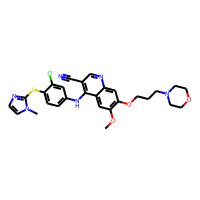
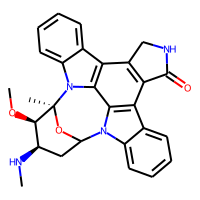
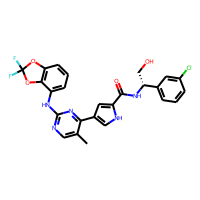
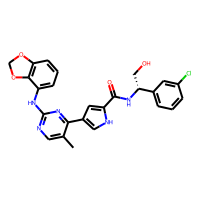
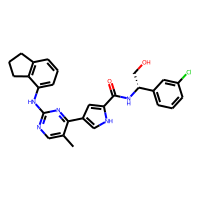

In [10]:
active_df.head()

Now let's do the same thing with the decoy molecules

In [11]:
path = "/content/DeepLearningLifeSciences/Chapter11/mk01/decoys_final.ism"
decoy_df = pd.read_csv(path,header=None,sep=" ")
decoy_df.columns = ["SMILES","ID"]
decoy_rows, decoy_cols = decoy_df.shape
decoy_df["label"] = ["Decoy"]*decoy_rows
PandasTools.AddMoleculeColumnToFrame(decoy_df,"SMILES","Mol")
add_property_columns_to_df(decoy_df)

In [12]:
tmp_df = active_df.append(decoy_df)

With properties calculated for both the active and the decoy sets, we can compare the properties of the two compound sets. To do the comparison, we will use violin plots. A violin plot can be thought of as analogous to a boxplot. The violin plot provides a mirrored, horizontal view of a frequency distribution. Ideally, we would like to see similar distributions for the active and decoy sets.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


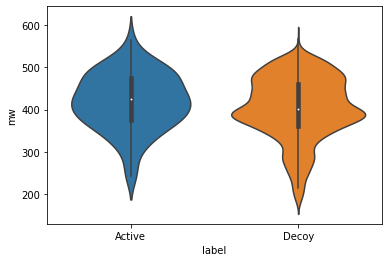

In [13]:
sns.violinplot(tmp_df["label"],tmp_df["mw"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


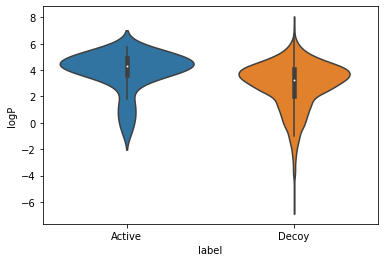

In [14]:
sns.violinplot(tmp_df["label"],tmp_df["logP"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


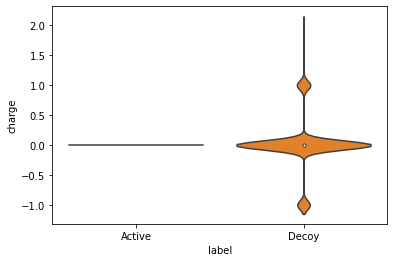

In [15]:
sns.violinplot(tmp_df["label"],tmp_df["charge"])

In [16]:
charged = decoy_df[decoy_df["charge"] != 0]

In [17]:
charged.shape[0]/decoy_df.shape[0]

0.16175824175824177